In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [8]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df[['price']])

In [11]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
  number_of_features = x.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = x.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_x.T) + b

    dw = -(2/total_samples) * (x.T.dot(y_true - y_predicted))
    db = -(2/total_samples) * np.sum(y_predicted - scaled_y)

    w = w - learning_rate * dw
    b = b - learning_rate * db

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list



w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([-8.17496153e+69, -1.10615337e+70]),
 4.681359765735537e+71,
 1.0905227756219652e+143)

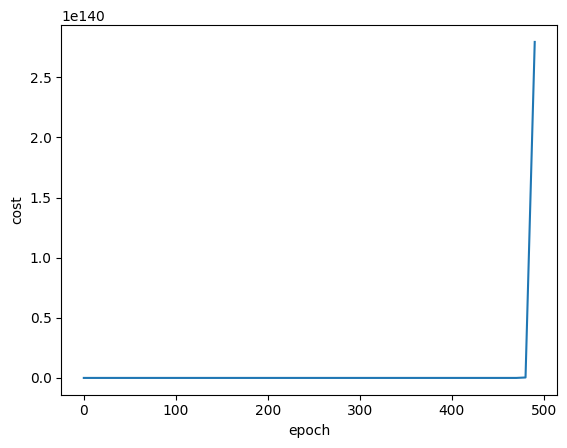

In [12]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [2]:
import tensorflow as tf

tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]